# Dimensionality Reduction 3

Learning objectives
1. Apply t-SNE and UMAP to different data sets and interpret the outputs
2. Learn how to visualise the model outputs
3. Explore differences based on chosen parameters
4. Interpret the results and compare them to other dimension reduction methods

UMAP is implemented in the `umap-learn` package

Install it via ```pip install umap-learn```

In [338]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap

## Load in datasets
Read in the omics datasets using the pandas [read_excel()](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) function. For this example we will be using plasma metabolomics data from Type 2 diabetes patients.

In [411]:
diabetes_plasma_metab = pd.read_excel("../Data/IBD_microbiome_species.xlsx")

In [414]:
diabetes_plasma_metab.head()

,Gender,Age,IBD,IBD_type,Methanobrevibacter_smithii,Methanobrevibacter_unclassified,Methanosphaera_stadtmanae,Actinomyces_graevenitzii,Actinomyces_odontolyticus,Actinomyces_turicensis,...,Clostridium_colicanis,Clostridium_sp_HGF2,Clostridium_sp_SS2_1,Peptoniphilus_sp_JC140,Blautia_sp_KLE_1732,Clostridium_bifermentans,Janthinobacterium_unclassified,Sutterella_parvirubra,Campylobacter_coli,Helicobacter_winghamensis
0,0,59,0,0,0.00000,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,69,0,0,0.00000,0.0,0.0,0.0,0.02725,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,59,0,0,0.00000,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,64,0,0,0.52035,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,59,0,0,5.95433,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can see the data contains 3 metadata columns: gender, age, and T2D (diabetes) status. 

In [368]:
# look at the number of diabetes vs non-diabetes patients
diabetes_plasma_metab["T2D"].value_counts()

1    179
0    177
Name: T2D, dtype: int64

### Scaling, exploratory analysis using PCA, and outlier detection

In [412]:
# Standard scale the data to have mean = 0 and SD = 1
diabetes_plasma_scaled = StandardScaler().fit_transform(diabetes_plasma_metab.iloc[:, 6:])

In [413]:
# perform PCA to perliminarily visualise the data and detect outliers
PCA_diabetes = PCA(n_components=4).fit_transform(diabetes_plasma_scaled)

In [415]:
PCA_df = pd.DataFrame(PCA_diabetes, index=diabetes_plasma_metab.index)
PCA_df["t2d"] = diabetes_plasma_metab["IBD_type"]
PCA_df

,0,1,2,3,t2d
0,-1.078594,-1.350211,-0.233176,-0.078385,0
1,6.020156,10.125515,-2.962592,2.345936,0
2,-0.844952,-1.472543,-1.898395,0.587394,0
3,-0.484549,-1.728795,-2.064068,0.333574,0
4,-1.114364,-1.361529,-0.449840,0.026917,0
...,...,...,...,...,...
377,-0.898924,-1.370931,0.115820,0.483632,1
378,-1.090082,-0.806225,0.862942,-0.577982,1
379,-0.811179,-1.083626,-1.048026,0.410968,1
380,-0.096744,-0.573769,-0.572315,-1.160485,1


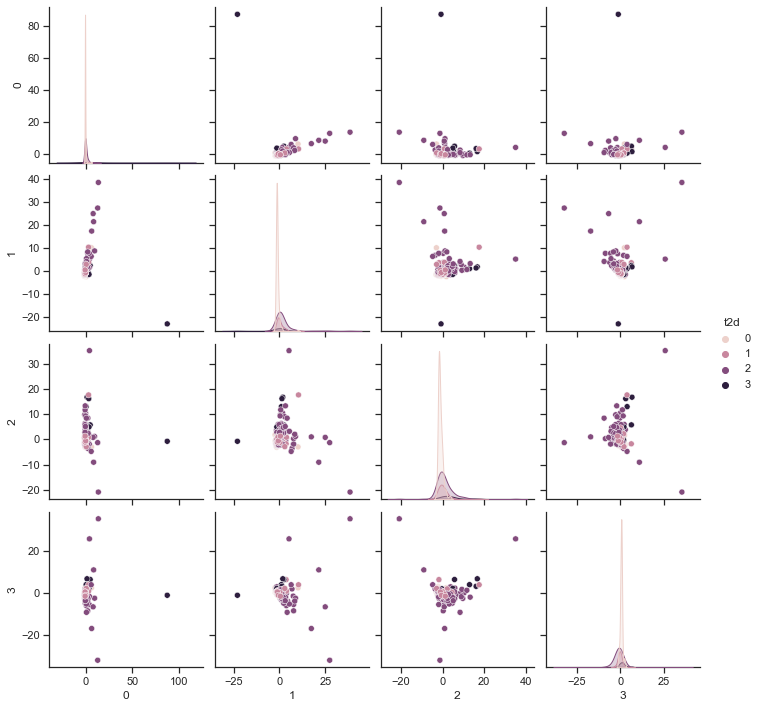

In [416]:
# plot the first 4 PCA components against each other
p = sns.pairplot(PCA_df, hue="t2d")
plt.show()

In [424]:
for i in range(0 ,4):
    print(PCA_df[i].sort_values(key=abs, ascending=False)[0:10].to_dict())

{260: 87.5830354914541, 339: 13.457222799503757, 346: 12.726512379745637, 208: 9.375959924594033, 335: 8.358921573041867, 336: 7.840289679151769, 165: 6.259120811091446, 1: 6.020155914867486, 321: 5.7559542190445105, 263: 4.667701280170828}
{339: 38.442307246671135, 346: 27.353334294508425, 336: 24.927927905165422, 260: -22.872399251919138, 335: 21.419913364776093, 165: 17.35742522574118, 315: 10.380294566904771, 1: 10.12551478385438, 208: 8.760297075211396, 337: 8.330571117502135}
{312: 35.115521571449044, 339: -20.820448342270943, 315: 17.59609303158021, 276: 16.701115308556624, 299: 16.124327562825126, 360: 13.27287589769573, 277: 12.965120219485906, 342: 11.696965236137379, 180: 10.406158508734586, 189: 9.740837581233533}
{339: 35.401313832284586, 346: -32.26788208805844, 312: 25.801669778771892, 165: -17.09247313305162, 335: 10.954560473950316, 369: -9.351148780134688, 199: -8.630056529285282, 336: -6.723925062653691, 276: 6.699606272340202, 263: 6.349102134875676}


In [425]:
diabetes_plasma_metab = diabetes_plasma_metab.drop([260, 339, 346, 312, 165])

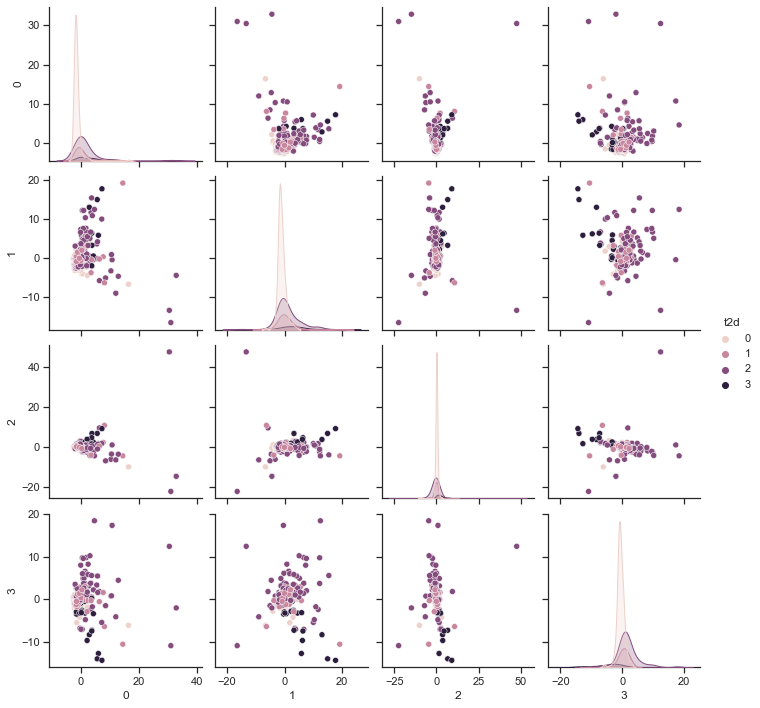

In [426]:
diabetes_plasma_scaled = StandardScaler().fit_transform(diabetes_plasma_metab.iloc[:, 6:])
PCA_diabetes = PCA(n_components=4).fit_transform(diabetes_plasma_scaled)
PCA_df = pd.DataFrame(PCA_diabetes, index=diabetes_plasma_metab.index)
PCA_df["t2d"] = diabetes_plasma_metab["IBD_type"]
PCA_df
# plot the first 4 PCA components against each other
p = sns.pairplot(PCA_df, hue="t2d")
plt.show()

In [427]:
for i in range(0 ,4):
    print(PCA_df[i].sort_values(key=abs, ascending=False)[0:10].to_dict())

{336: 32.811353938251955, 335: 30.961793374320727, 208: 30.438593502357772, 1: 16.39502943195288, 315: 14.428045685094736, 327: 12.881037804894671, 321: 12.027915196636874, 199: 10.743930010186917, 337: 10.5302421394286, 176: 10.341410301687832}
{315: 19.180178783701855, 299: 17.70615313011491, 335: -16.494730330006526, 360: 15.378894023764811, 276: 14.947971430550908, 208: -13.36050633522058, 277: 12.989411232275476, 369: 12.443693953602528, 342: 12.179514938472959, 189: 12.176202002744372}
{208: 47.629595768361774, 335: -22.430187674684213, 336: -14.830238043988546, 262: 10.77056256351334, 1: -10.092289079646397, 207: 9.472769380128272, 299: 9.115730042666613, 218: -7.058593903453573, 276: 6.711133253165785, 289: 6.685224054650275}
{369: 18.50106960633574, 199: 17.419612785819513, 299: -14.345798933605405, 276: -13.991222784541948, 263: -12.729427258813761, 208: 12.490089765349923, 335: -10.888991271640341, 315: -10.553558982257838, 361: 10.27244611886535, 329: 9.863665821494985}


In [429]:
diabetes_plasma_metab = diabetes_plasma_metab.drop([336, 335, 208, 369, 199])

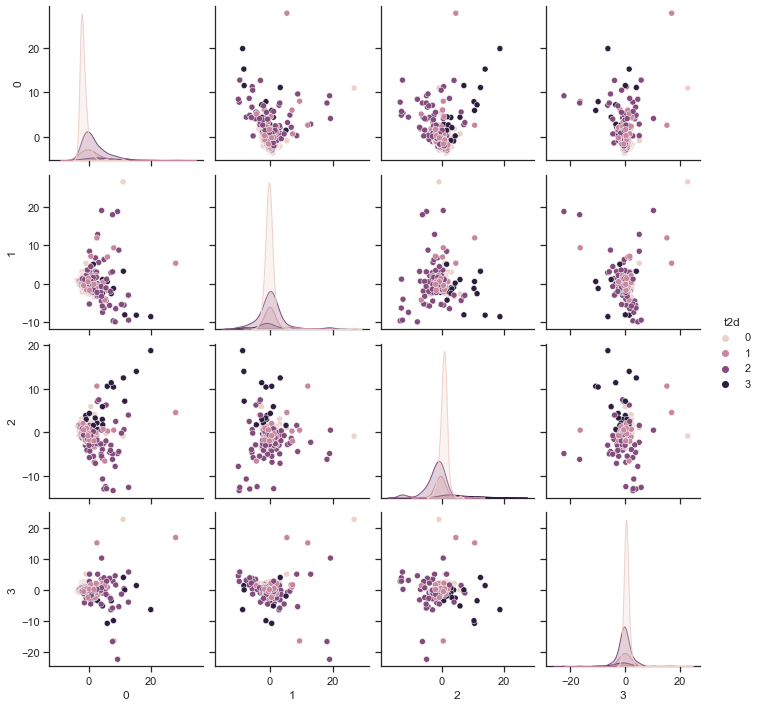

In [430]:
diabetes_plasma_scaled = StandardScaler().fit_transform(diabetes_plasma_metab.iloc[:, 6:])
PCA_diabetes = PCA(n_components=4).fit_transform(diabetes_plasma_scaled)
PCA_df = pd.DataFrame(PCA_diabetes, index=diabetes_plasma_metab.index)
PCA_df["t2d"] = diabetes_plasma_metab["IBD_type"]
PCA_df
# plot the first 4 PCA components against each other
p = sns.pairplot(PCA_df, hue="t2d")
plt.show()

In [446]:
for i in range(0 ,4):
    print(PCA_df[i].sort_values(key=abs, ascending=False)[0:10].to_dict())

{315: 27.892831923099916, 299: 19.89962757991078, 276: 15.25945661003071, 360: 12.77354268296627, 305: 12.70354804697683, 277: 11.540577143410625, 180: 11.301329961816732, 263: 11.098736115342515, 1: 10.983847242352704, 306: 10.48744073244712}
{1: 26.593936429427817, 321: 19.11309287959232, 176: 18.84653192244016, 327: 18.016119285744892, 218: 12.873560878845547, 262: 11.954667594713696, 342: -10.002096796560549, 189: -9.73234433029599, 360: -9.54810345177, 291: 9.360949073902635}
{299: 18.68252546406757, 276: 13.941878460808363, 189: -13.257808374827658, 330: -12.89174268297798, 361: -12.828548554231348, 360: -12.523406517935431, 263: 12.452686799634122, 329: -12.352536723561563, 298: 11.360555399649954, 317: -10.612976193386706}
{1: 22.72302890230228, 176: -22.278359403066677, 315: 16.87068928351266, 327: -16.566462648522187, 291: -16.374804129325472, 262: 15.1588148820994, 289: -10.714813745984891, 321: 10.27423923696983, 290: -9.846604831795515, 213: -6.370586712857291}


In [447]:
diabetes_plasma_metab = diabetes_plasma_metab.drop([315, 299, 276, 1, 176])

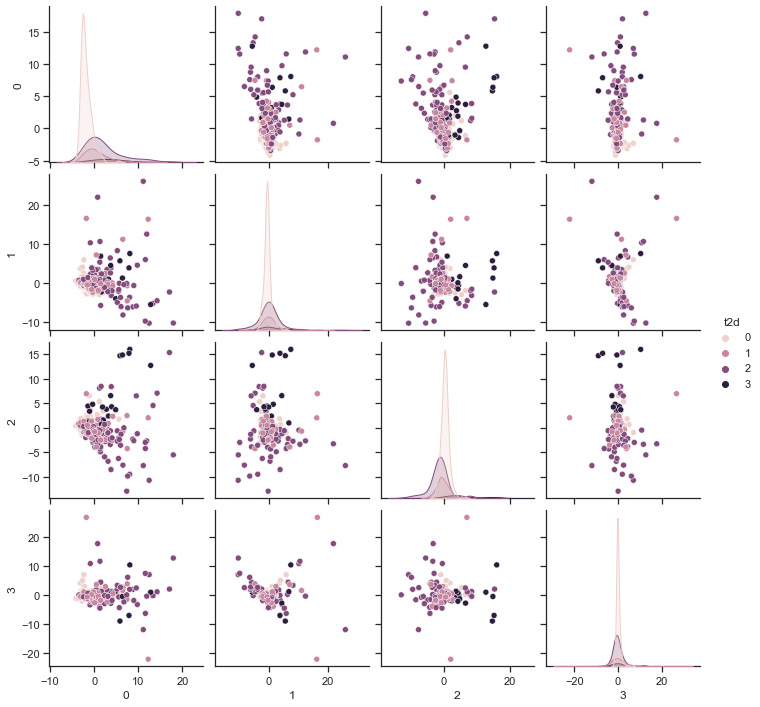

In [448]:
diabetes_plasma_scaled = StandardScaler().fit_transform(diabetes_plasma_metab.iloc[:, 6:])
PCA_diabetes = PCA(n_components=4).fit_transform(diabetes_plasma_scaled)
PCA_df = pd.DataFrame(PCA_diabetes, index=diabetes_plasma_metab.index)
PCA_df["t2d"] = diabetes_plasma_metab["IBD_type"]
PCA_df
# plot the first 4 PCA components against each other
p = sns.pairplot(PCA_df, hue="t2d")
plt.show()

There are no obvious outliers, so we can move on to appling t-SNE

## T-distributed Stochastic Neighbor Embedding (t-SNE)
t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

t-SNE can be perfomed using the sklearn.[TSNE()](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) function. We apply the fit_transform function to the TSNE class to create an embedding of the metagenomic data.

In [449]:
# perfrom t-SNE with default parameters
tsne_embedding = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(diabetes_plasma_scaled)

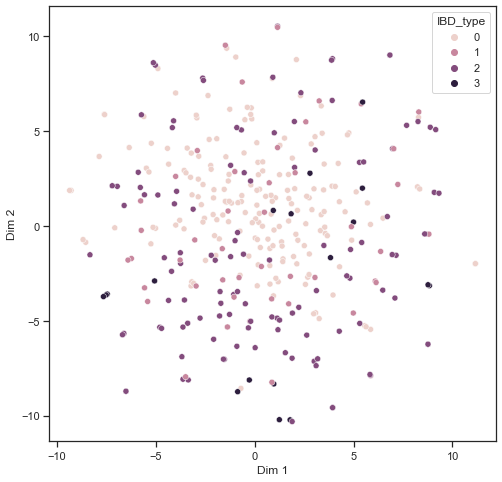

In [450]:
sns.set_style("ticks")
sns.set_context("notebook")
sns.set_palette("Paired")
plt.figure(figsize=(8, 8))

p = sns.scatterplot(x=tsne_embedding[:, 0],
 y=tsne_embedding[:, 1], 
 hue=diabetes_plasma_metab["IBD_type"])

p.set_xlabel("Dim 1")
p.set_ylabel("Dim 2")

plt.show()

### t-SNE parameters

There are 4 key [parameters](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) that need tuning when performing t-SNE. These are [taken from sklearn]:
1. `n_components`: similar to PCA, NNMF, and MDS, we need to manually specify the number of components
2. `perplexity`: The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significantly different results.
3. `early_exaggeration`: Controls how tight natural clusters in the original space are in the embedded space and how much space will be between them. For larger values, the space between natural clusters will be larger in the embedded space. Again, the choice of this parameter is not very critical. If the cost function increases during initial optimization, the early exaggeration factor or the learning rate might be too high.
4. `learning_rate`: The learning rate for t-SNE is usually in the range [10.0, 1000.0]. If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers. If the cost function gets stuck in a bad local minimum increasing the learning rate may help. Note that many other t-SNE implementations (bhtsne, FIt-SNE, openTSNE, etc.) use a definition of learning_rate that is 4 times smaller than ours. So our learning_rate=200 corresponds to learning_rate=800 in those other implementations. The ‘auto’ option sets the learning_rate to max(N / early_exaggeration / 4, 50) where N is the sample size, following [4] and [5]. This will become default in 1.2.

Let's test some of these parameters and see what effects they have on the visualisation of the data:

### Perplexity - n neighbours

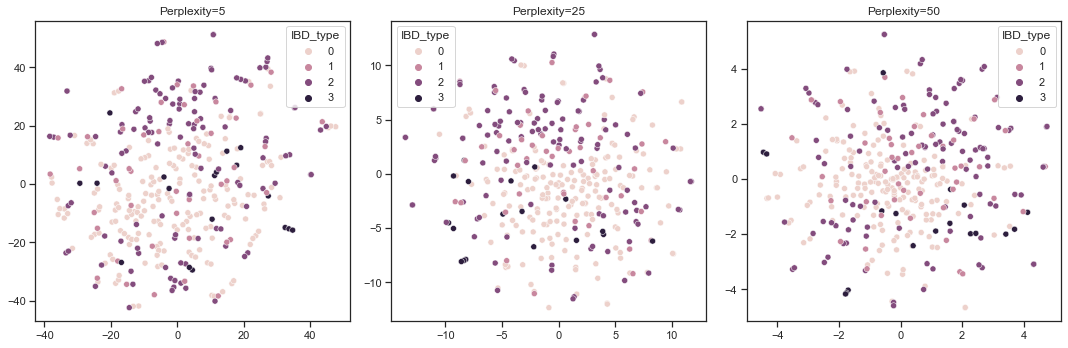

In [451]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

axs = [ax1, ax2, ax3]

# set some perplexity values we want to test
perplexity_vals = [5, 25, 50]

# loop over each perplexity value and perform t-SNE with this value 
for ax, i in enumerate(perplexity_vals):
    tsne_embedding = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=i).fit_transform(diabetes_plasma_scaled)    

    # plot the first two components using a scatterplot
    sns.scatterplot(x=tsne_embedding[:, 0], y=tsne_embedding[:, 1], hue=diabetes_plasma_metab["IBD_type"], ax=axs[ax])
    axs[ax].set_title("Perplexity="+str(i))

plt.tight_layout()
plt.show()

### Learning rate

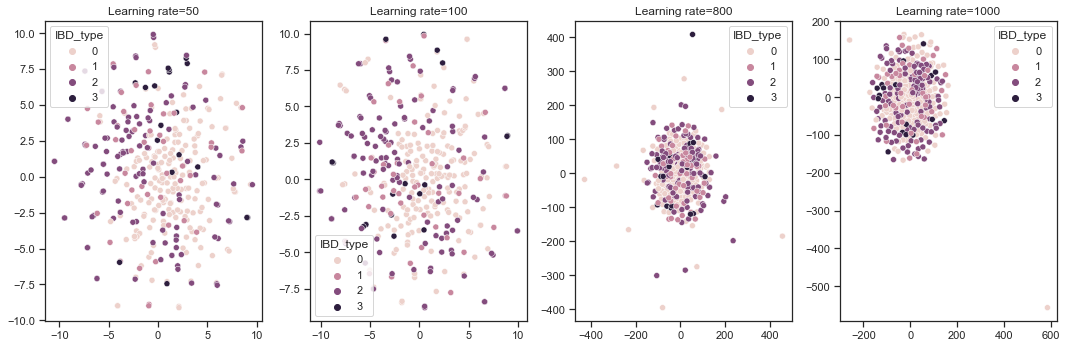

In [452]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))

axs = [ax1, ax2, ax3, ax4]

# set some  values we want to test
learningrate_vals = [50, 100, 800, 1000]

# loop over each value and perform t-SNE with this value 
for ax, i in enumerate(learningrate_vals):
    tsne_embedding = TSNE(n_components=2, init='random', learning_rate=i).fit_transform(diabetes_plasma_scaled)    

    # plot the first two components using a scatterplot
    sns.scatterplot(x=tsne_embedding[:, 0], y=tsne_embedding[:, 1], hue=diabetes_plasma_metab["IBD_type"], ax=axs[ax])
    axs[ax].set_title("Learning rate="+str(i))

plt.tight_layout()
plt.show()

Have a go at changing the learning rate and perplexity parameters to visualise the data in the scatter plot below. What is the optimal combination of parameters you can find?

Note: unlike PCA, in t-SNE there are multiple solutions, so the output will be different each time

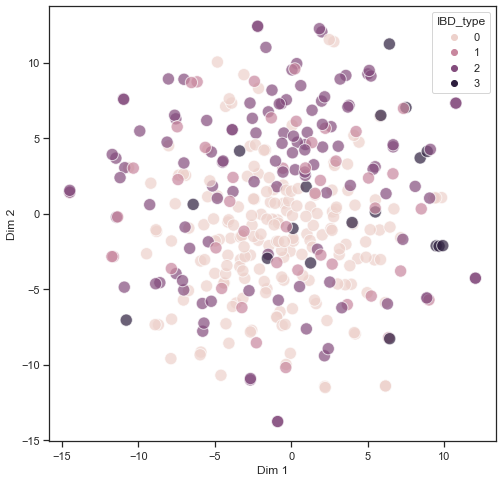

In [455]:
tsne_embedding = TSNE(n_components=2, init='random', learning_rate=300, perplexity=25).fit_transform(diabetes_plasma_scaled)    

plt.figure(figsize=(8, 8))
p = sns.scatterplot(x=tsne_embedding[:, 0],
 y=tsne_embedding[:, 1], 
 hue=diabetes_plasma_metab["IBD_type"], 
 s=150, 
 alpha=0.7)

p.set_xlabel("Dim 1")
p.set_ylabel("Dim 2")

plt.show()

### Using PCA to reduce dimensionality prior to t-SNE
It is highly recommended to run PCA before t-SNE to reduce computation time, particularly on very high dimensional datasets. 30-100 components is ideal. 

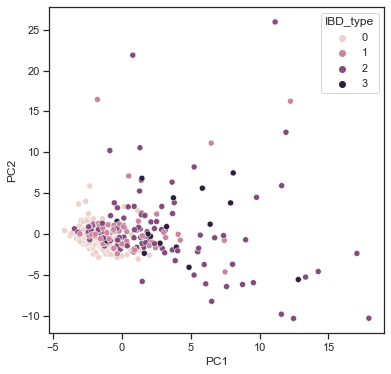

In [456]:
# Run 50 component PCA on the scaled data
PCA_diabetes = PCA(n_components=50).fit_transform(diabetes_plasma_scaled)

plt.figure(figsize=(6, 6))
p = sns.scatterplot(x=PCA_diabetes[:, 0],
 y=PCA_diabetes[:, 1], 
 hue=diabetes_plasma_metab["IBD_type"])

p.set_xlabel("PC1")
p.set_ylabel("PC2")
plt.show()

In [457]:
# make a dataframe with the 50 PCA components we have just computed
PCA_diabetes_df = pd.DataFrame(PCA_diabetes)
PCA_diabetes_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.812143,-1.951146,-0.529697,0.197137,-0.323198,-0.969078,-0.857871,0.195840,-0.188625,0.723264,...,0.195171,0.589790,0.023152,-0.243699,0.002122,0.478802,-0.137576,0.023690,0.382271,0.612128
1,-2.787022,-0.443830,0.393645,-0.434303,0.250836,-0.568568,0.364289,0.427108,0.030344,0.035064,...,-0.366519,-0.384482,0.204575,0.114561,0.188331,1.085350,0.439153,-1.212066,0.155098,-0.116758
2,-3.199347,-0.576961,-0.201584,-0.804798,0.568706,-0.685385,1.157008,1.138992,0.140431,-0.298438,...,1.122332,1.193089,0.110090,-1.076098,-0.534913,-0.003971,-0.959794,0.981000,0.062666,1.231504
3,-1.069592,-1.664339,-0.821931,0.180529,-0.046449,-0.651410,-0.493725,-0.546144,-0.573224,0.223085,...,-0.246642,-0.008131,-0.356988,0.812516,-0.945212,0.917421,0.179227,-0.518155,0.338973,-0.076229
4,-2.050357,-2.482289,-1.211363,0.151906,0.766374,-1.478784,-0.749578,0.862364,-0.088743,1.492491,...,1.227813,0.340806,0.137850,-0.353857,-0.799926,-5.218280,-3.246465,4.389670,-2.349048,4.437241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.589135,-1.751412,1.376106,0.121837,0.440270,-0.669847,-0.175732,-0.530297,-0.977498,0.818990,...,0.700356,0.114717,0.456405,-0.523162,-0.357108,-0.081278,-0.070112,0.680061,-0.303506,0.155114
363,0.929156,-1.972089,-1.050588,-0.451160,-0.324003,0.349506,-0.791885,-1.423938,-0.512133,0.443127,...,-0.265657,-0.411690,-0.506974,0.246420,-0.333534,-0.192320,-0.623906,-0.180070,0.009569,0.238310
364,-1.567799,-0.574098,0.540706,-0.651306,-0.274949,-0.658329,0.261943,0.064483,0.547288,0.417575,...,0.695108,-0.593189,0.887231,0.634762,0.488729,0.622680,-0.601666,-1.580509,-0.504168,0.132926
365,0.107442,0.893608,-0.795498,-2.660768,-1.243104,2.027555,-0.655828,-0.296216,2.161297,-1.135014,...,-1.390387,0.387299,-0.515132,-0.700233,-0.828241,-0.348182,0.755320,1.542031,-0.160943,0.244176


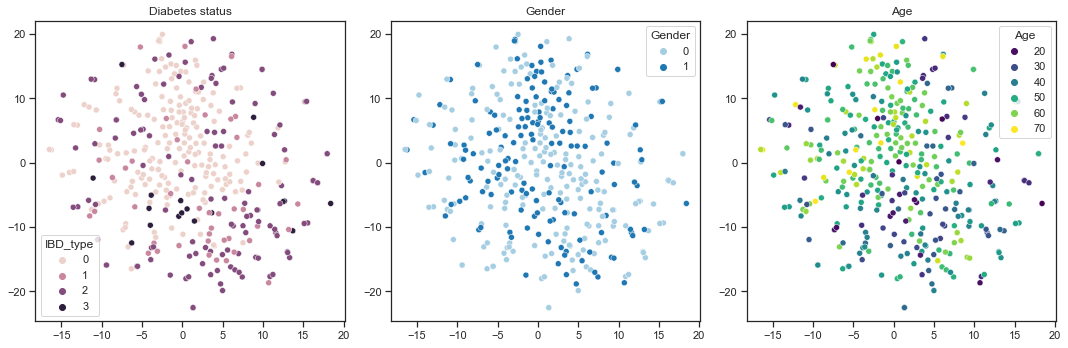

In [515]:
# use the 50 PCA components as input for tSNE
tsne_embedding_PCA = TSNE(n_components=2, init='random', learning_rate=500, perplexity=25).fit_transform(PCA_diabetes_df)    

# plot the tSNE components - colour using different covariates
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=tsne_embedding_PCA[:, 0], y=tsne_embedding_PCA[:, 1], hue=diabetes_plasma_metab["IBD_type"], ax=ax1)
ax1.set_title("Diabetes status")

sns.scatterplot(x=tsne_embedding_PCA[:, 0], y=tsne_embedding_PCA[:, 1], hue=diabetes_plasma_metab["Gender"], ax=ax2)
ax2.set_title("Gender")

sns.scatterplot(x=tsne_embedding_PCA[:, 0], y=tsne_embedding_PCA[:, 1], hue=diabetes_plasma_metab["Age"], ax=ax3, palette="viridis")
diabetes_plasma_metab['Age'] = diabetes_plasma_metab['Age'].replace("na", np.nan)
ax3.set_title("Age")

plt.tight_layout()
plt.show()

## Uniform Manifold Approximation & Projection (UMAP)
Read the UMAP [documentation](https://umap-learn.readthedocs.io/en/latest/index.html) for an in-depth description of the method and the implementation

In [517]:
UMAP_embedding = umap.UMAP().fit_transform(diabetes_plasma_scaled)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


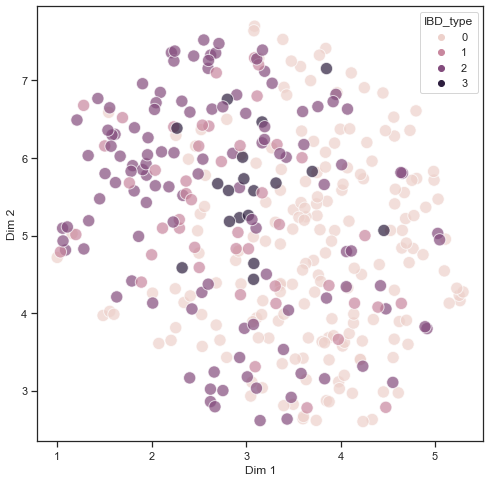

In [518]:
plt.figure(figsize=(8, 8))
p = sns.scatterplot(x=UMAP_embedding[:, 0],
 y=UMAP_embedding[:, 1], 
 hue=diabetes_plasma_metab["IBD_type"], 
 s=150, 
 alpha=0.7)

p.set_xlabel("Dim 1")
p.set_ylabel("Dim 2")

plt.show()

### UMAP parameters
There are 4 key [parameters](https://umap-learn.readthedocs.io/en/latest/parameters.html) in UMAP (taken from UMAP website):
1. `n_components`: Same as PCA, t-SNE, etc, allows you to decide the number of components to reduce the input data to.
2. `n_neighbours`: This parameter controls how UMAP balances local versus global structure in the data. It does this by constraining the size of the local neighborhood UMAP will look at when attempting to learn the manifold structure of the data. This means that low values of n_neighbors will force UMAP to concentrate on very local structure (potentially to the detriment of the big picture), while large values will push UMAP to look at larger neighborhoods of each point when estimating the manifold structure of the data, losing fine detail structure for the sake of getting the broader of the data.
3. `min_dist`: The min_dist parameter controls how tightly UMAP is allowed to pack points together. It, quite literally, provides the minimum distance apart that points are allowed to be in the low dimensional representation. This means that low values of min_dist will result in clumpier embeddings. This can be useful if you are interested in clustering, or in finer topological structure. Larger values of min_dist will prevent UMAP from packing points together and will focus on the preservation of the broad topological structure instead.
4. `metric`: This controls how distance is computed in the ambient space of the input data. By default UMAP supports a wide variety of metrics, including Euclidean distance (see full [list](https://umap-learn.readthedocs.io/en/latest/parameters.html#metric)) as well as custom metrics. 

Let's look at these parameters in more detail:

#### n_neighbours

/Users/cw2019/opt/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


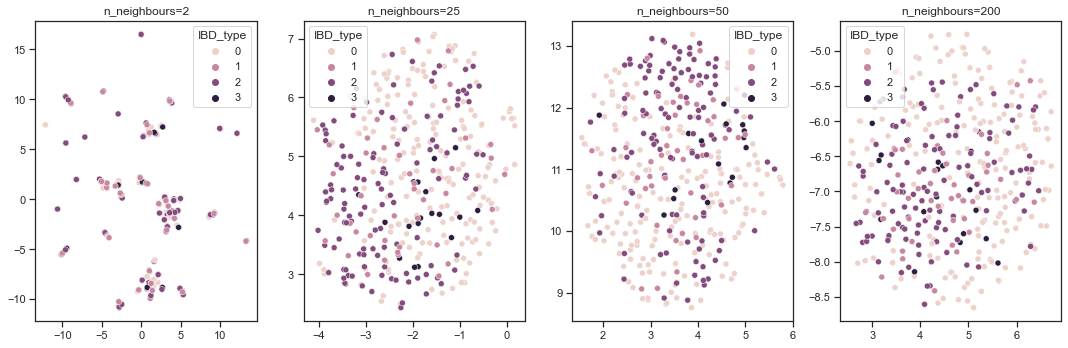

In [520]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))

axs = [ax1, ax2, ax3, ax4]

# set some  values we want to test
n_neighbours_vals = [2, 25, 50, 200]

# loop over each value and perform t-SNE with this value 
for ax, i in enumerate(n_neighbours_vals):
    UMAP_embedding = umap.UMAP(n_components=2, n_neighbors=i).fit_transform(diabetes_plasma_scaled)

    # plot the first two components using a scatterplot
    sns.scatterplot(x=UMAP_embedding[:, 0], y=UMAP_embedding[:, 1], hue=diabetes_plasma_metab["IBD_type"], ax=axs[ax])
    axs[ax].set_title("n_neighbours="+str(i))

plt.tight_layout()
plt.show()

#### min_dist

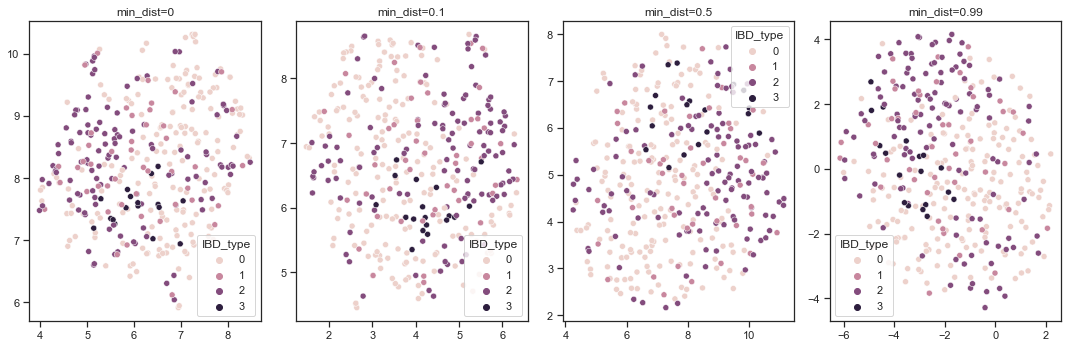

In [523]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))

axs = [ax1, ax2, ax3, ax4]

# set some  values we want to test
min_dist_vals = [0, 0.1, 0.5, 0.99]

# loop over each value and perform t-SNE with this value 
for ax, i in enumerate(min_dist_vals):
    UMAP_embedding = umap.UMAP(n_components=2, min_dist=i).fit_transform(diabetes_plasma_scaled)

    # plot the first two components using a scatterplot
    sns.scatterplot(x=UMAP_embedding[:, 0], y=UMAP_embedding[:, 1], hue=diabetes_plasma_metab["IBD_type"], ax=axs[ax])
    axs[ax].set_title("min_dist="+str(i))

plt.tight_layout()
plt.show()

#### metric

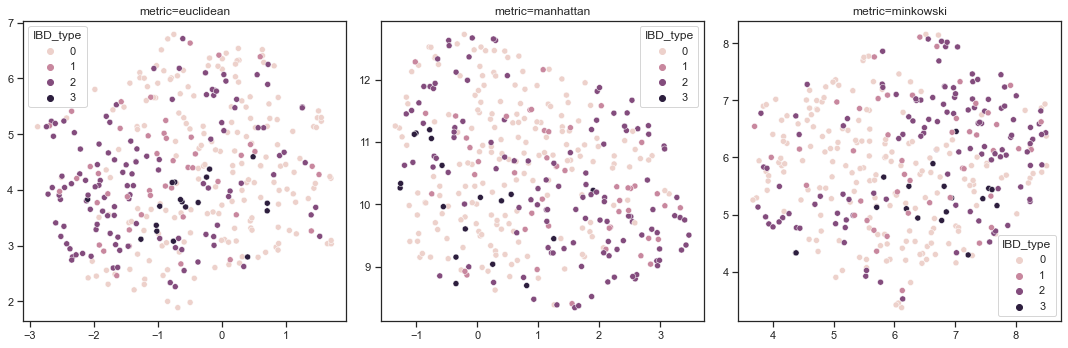

In [525]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

axs = [ax1, ax2, ax3]

# set some  values we want to test
metric_vals = ["euclidean", "manhattan", "minkowski"]

# loop over each value and perform t-SNE with this value 
for ax, i in enumerate(metric_vals):
    UMAP_embedding = umap.UMAP(n_components=2, metric=i).fit_transform(diabetes_plasma_scaled)

    # plot the first two components using a scatterplot
    sns.scatterplot(x=UMAP_embedding[:, 0], y=UMAP_embedding[:, 1], hue=diabetes_plasma_metab["IBD_type"], ax=axs[ax])
    axs[ax].set_title("metric="+str(i))

plt.tight_layout()
plt.show()

Have a go at changing these parameters to obtain the best possible embedding on the data:

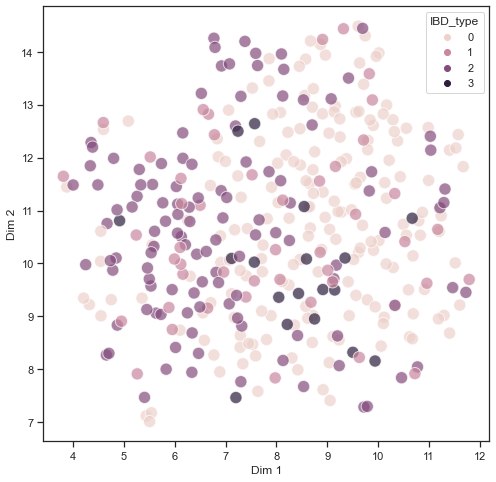

In [528]:
UMAP_embedding = umap.UMAP(n_components=2, metric="euclidean", n_neighbors=5, min_dist=0.5).fit_transform(diabetes_plasma_scaled)

plt.figure(figsize=(8, 8))
p = sns.scatterplot(x=UMAP_embedding[:, 0],
 y=UMAP_embedding[:, 1], 
 hue=diabetes_plasma_metab["IBD_type"], 
 s=150, 
 alpha=0.7)

p.set_xlabel("Dim 1")
p.set_ylabel("Dim 2")

plt.show()

## Your turn

Load in another dataset in the `Data` folder  and perform PCA, t-SNE and UMAP on it, visusalising the data using scatterplots as above. Tune the parameters as necessary. Which dimensionality reduction would you use for visualisation?

In [529]:
# Import dataset

In [ ]:
# Scale the data

In [ ]:
# Perform PCA

# Visualise PCA

In [ ]:
# Perform t-SNE

# Visualise t-SNE

In [ ]:
# Perform UMAP

# Visualise UMAP